# Capstone Project: The Battle of Neighborhoods
## The Ideal Neighborhood for New Restaurants in Toronto

### Introduction/Business Problem

>Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

Prospective new store owners need to take into account many different factors when deciding where to open their business, even moreso for a business such as a restaurant. Knowing the location and neighborhood density of different genres of food would help owners know better neighborhoods to target, since opening the 2nd Italian restaurant in a neighborhood likely has better staying potential and earning potential than the 8th Italian restaurant in a separate part of Toronto. There are additional factors a prospective restaurant owner might utilize, such as data within their specific cuisine about the targeted audience and price range for restaurants in the area. Additionally the *quality* of the existing restaurants in the area may provide information about potential in opening another restaurant of the same cuisine in a given neighborhood. 

All of this data can be scraped or extrapolated from Foursquare and similar databases.

### Data

>Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

The data needed would be the separate neighborhoods in Toronto, data of a few different types of restaurants (ie. Italian, Chinese, German) and which neighborhoods they are in, and from that we would need to find the relative density of those types of restaurants in each neighborhood compared to the neighborhood's population. The location data for restaurants around Toronto can be used to identify where there is a relative lack in cuisine in certain neighborhoods, and from there extrapolate possible "untapped markets" for a new restaurant opening.

Further, we can gather a Foursquare dataset that includes the average review rating of each of these restaurants to also highlight where there might be, for example, "no good Chinese place" in a certain area. There would be potential to capitalize on a local population that could be more receptive to another Chinese restaurant moving into the area even when there are a decent number of similar but unpopular restaurants of the same cuisine already established.

There may even be conclusions we can draw from Foursquare data extracted about the average price range a customer may expect at the given restaurants in the area. If there are only upscale Italian restaurants in a particular neighborhood, it's reasonable to assume there's potential in a "Mom and Pop" type family-friendly Italian restaurant in the neighborhood. 

In [1]:
!pip install pandas
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json, requests

In [2]:
url = 'https://api.foursquare.com/v2/venues/explore'
client_id='CKXZADO1B5NRIR1ZWLSOXEHTJ24AGMRTGKL3NWOBKAZ3HZT3'
client_secret='AHQU3CAA5H0UVCFI031TW5XB0S0JUZA1DNLKMS13EBAJD1DL'
version='20191223'
latitude='43.6532'
longitude='-79.3832'
ll='43.6532,-79.3832'

In [3]:
!pip install folium
!pip install geopy

In [4]:
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
from sklearn.cluster import KMeans 
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
import folium
print("Successful import")

Successful import


#### Creating base map of Toronto

In [5]:
toronto_map = folium.Map(location=[43.6532,-79.3832], zoom_start=12)
toronto_map

#### Getting Toronto area neighborhoods into a usable dataframe

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


In [7]:
df_toronto=pd.DataFrame(columns=['Postal Code','Borough','Neighborhood'])
df_toronto

,Postal Code,Borough,Neighborhood


In [8]:
for col_name, data in df.items():
    #print("data is:",data)
    for i in range(20):
        txt=data[i]
        c1=txt[0:3]
        sep='('
        pos=txt.find(sep)
        if pos>0:
            c2=txt[3:pos]
            c3=txt[pos+1:len(txt)-1].replace(" / ",",")
        else:
            c2=txt[3:]
            c3="Not assigned"
        df_toronto.loc[len(df_toronto.index)] = [c1,c2,c3] 
df_toronto.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn


In [9]:
df_toronto.drop(df_toronto[df_toronto['Borough'] == 'Not assigned'].index, inplace = True) 
df_toronto["Neighborhood"].loc[df_toronto["Neighborhood"]=="Not assigned"] = df_toronto["Borough"]
df_toronto[df_toronto["Neighborhood"]=="Not assigned"].count()
df.reset_index(inplace=True, drop=True)
print("Shape of Frame after filtering ",df_toronto.shape)

Shape of Frame after filtering  (103, 3)


In [10]:
df_toronto

,Postal Code,Borough,Neighborhood
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
...,...,...,...
170,M9N,York,Weston
171,M9P,Etobicoke,Westmount
172,M9R,Etobicoke,"Kingsview Village,St. Phillips,Martin Grove Ga..."
175,M9V,Etobicoke,"South Steeles,Silverstone,Humbergate,Jamestown..."


In [11]:
import requests
import io
datastr = requests.get("http://cocl.us/Geospatial_data",allow_redirects=True).text
data_file = io.StringIO(datastr)
geo=pd.read_csv(data_file)
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
df_toronto_geo=pd.merge(df_toronto, geo, on='Postal Code')
df_toronto_geo

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village,St. Phillips,Martin Grove Ga...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles,Silverstone,Humbergate,Jamestown...",43.739416,-79.588437


In [13]:
url = 'https://api.foursquare.com/v2/venues/explore'
client_id='CKXZADO1B5NRIR1ZWLSOXEHTJ24AGMRTGKL3NWOBKAZ3HZT3'
client_secret='AHQU3CAA5H0UVCFI031TW5XB0S0JUZA1DNLKMS13EBAJD1DL'
version='20191223'
latitude='43.6532'
longitude='-79.3832'
ll='43.6532,-79.3832'
limit=500

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            latitude, 
            longitude, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Toronto_venues = getNearbyVenues(names=df_toronto_geo['Neighborhood'],
                                   latitudes=df_toronto_geo['Latitude'],
                                   longitudes=df_toronto_geo['Longitude']
                                )

Malvern,Rouge
Rouge Hill,Port Union,Highland Creek
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park,Ionview,East Birchmount Park
Golden Mile,Clairlea,Oakridge
Cliffside,Cliffcrest,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Wexford Heights,Scarborough Town Centre
Wexford,Maryvale
Agincourt
Clarks Corners,Tam O'Shanter,Sullivan
Milliken,Agincourt North,Steeles East,L'Amoreaux East
Steeles West,L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
York Mills,Silver Hills
Willowdale,Newtonbrook
Willowdale)Sout
York Mills West
Willowdale)Wes
Parkwoods
Don Mills)Nort
Don Mills)South(Flemingdon Park
Bathurst Manor,Wilson Heights,Downsview North
Northwood Park,York University
Downsview)East (CFB Toronto
Downsview)Wes
Downsview)Centra
Downsview)Northwes
Victoria Village
Parkview Hill,Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth East
The Danforth West,Riverdale
India Ba

In [20]:
# set number of clusters
kclusters = 5

# toronto_grouped_clustering = df_merged.drop('Neighbourhood', 1)

toronto_grouped_clustering = df_toronto_geo.drop(['Neighborhood', 'Borough', 'Postal Code'], axis=1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(len(kmeans.labels_))
print(toronto_grouped_clustering.shape[0])

103
103


In [21]:
# add clustering labels
df_toronto_geo.insert(0, 'Cluster Labels', kmeans.labels_)
df_toronto_geo.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,2,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,2,M1G,Scarborough,Woburn,43.770992,-79.216917
4,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_toronto_geo['Latitude'], df_toronto_geo['Longitude'], df_toronto_geo['Neighborhood'], df_toronto_geo['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The folium map above shows neighborhoods as clusters, depending on the number of coffee shops in each neighborhood. 

Cluster 0 - Red 

Cluster 1 - Purple 

Cluster 2 - Turquoise 

Cluster 3 - Green 

Cluster 4 - Orange

Let's find out the number of coffee shops in each cluster.

In [28]:
def getcoffeeNearbyVenues(names, latitudes, longitudes, radius=500):
    
    coffee_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng,
            'coffee',
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        coffee_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    coffee_venues = pd.DataFrame([item for coff_list in coffee_list for item in coff_list])
    coffee_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(coffee_venues)

In [29]:
Toronto_venues = getcoffeeNearbyVenues(names=df_toronto_geo['Neighborhood'],
                                   latitudes=df_toronto_geo['Latitude'],
                                   longitudes=df_toronto_geo['Longitude']
                                  )

Malvern,Rouge
Rouge Hill,Port Union,Highland Creek
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park,Ionview,East Birchmount Park
Golden Mile,Clairlea,Oakridge
Cliffside,Cliffcrest,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Wexford Heights,Scarborough Town Centre
Wexford,Maryvale
Agincourt
Clarks Corners,Tam O'Shanter,Sullivan
Milliken,Agincourt North,Steeles East,L'Amoreaux East
Steeles West,L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
York Mills,Silver Hills
Willowdale,Newtonbrook
Willowdale)Sout
York Mills West
Willowdale)Wes
Parkwoods
Don Mills)Nort
Don Mills)South(Flemingdon Park
Bathurst Manor,Wilson Heights,Downsview North
Northwood Park,York University
Downsview)East (CFB Toronto
Downsview)Wes
Downsview)Centra
Downsview)Northwes
Victoria Village
Parkview Hill,Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth East
The Danforth West,Riverdale
India Ba

In [31]:
print(Toronto_venues.shape)
Toronto_venues.head()

(917, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Krispy Kreme Doughnuts,43.767169,-79.189660,Donut Shop
1,Woburn,43.770992,-79.216917,Starbucks,43.770037,-79.221156,Coffee Shop
2,Woburn,43.770992,-79.216917,Tim Hortons,43.770827,-79.223078,Coffee Shop
3,Cedarbrae,43.773136,-79.239476,Gerhard's Chocolates,43.775702,-79.241935,Café
4,"Kennedy Park,Ionview,East Birchmount Park",43.727929,-79.262029,Tim Hortons,43.726895,-79.266157,Coffee Shop


In [32]:
# the number of venues returned for each neighborhood
num_coffe_shops = Toronto_venues.groupby('Neighborhood').count()
num_coffe_shops.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,2,2,2,2,2,2
"Alderwood,Long Branch",4,4,4,4,4,4
"Bathurst Manor,Wilson Heights,Downsview North",2,2,2,2,2,2
Bayview Village,1,1,1,1,1,1
"Bedford Park,Lawrence Manor East",4,4,4,4,4,4


In [48]:
#merge number of coffee shops with padaframe

# num_coffe_shops = num_coffe_shops.drop(['Neighborhood Longitude', 'Venue', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1)
# num_coffe_shops = num_coffe_shops.rename(columns={'Neighborhood Latitude':'Neighborhood' })

df_merged_coffee_shops = df_toronto_geo.merge(num_coffe_shops, left_on='Neighborhood', right_on='Neighborhood', how = 'left')
df_merged_coffee_shops.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,NaN,NaN,NaN,NaN,NaN,NaN
2,2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,1.0,1.0,1.0,1.0,1.0,1.0
3,2,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,2.0,2.0,2.0,2.0,2.0
4,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,1.0,1.0,1.0,1.0,1.0


## Machine Learning

In [49]:
df_merged_coffee_shops = df_merged_coffee_shops.drop(['Neighborhood Longitude', 'Venue', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1)
df_merged_coffee_shops = df_merged_coffee_shops.rename(columns={'Neighborhood Latitude':'Number of coffee shops' })

In [50]:
df_merged_coffee_shops.head()

df_merged_coffee_shops.isnull().sum(axis = 0)

df_merged_coffee_shops = df_merged_coffee_shops.fillna(0)

df_merged_coffee_shops.isnull().sum(axis = 0)

Cluster Labels            0
Postal Code               0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Number of coffee shops    0
dtype: int64

#### Cluster Neighborhoods

In [51]:
# set number of clusters
kclusters = 5

# toronto_grouped_clustering = df_merged.drop('Neighbourhood', 1)

toronto_grouped_clustering = df_merged_coffee_shops.drop(['Neighborhood', 'Borough', 'Postal Code','Latitude','Longitude'], axis=1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(len(kmeans.labels_))
print(toronto_grouped_clustering.shape[0])

103
103


In [52]:
# add clustering labels
df_merged_coffee_shops.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of coffee shops
0,2,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353,0.0
1,2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,0.0
2,2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,1.0
3,2,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0
4,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0


In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged_coffee_shops['Latitude'], df_merged_coffee_shops['Longitude'], df_merged_coffee_shops['Neighborhood'], df_merged_coffee_shops['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
# the number of venues returned for each neighborhood
cluster_analysis_df = df_merged_coffee_shops.groupby('Cluster Labels')['Number of coffee shops'].sum()
cluster_analysis_df.head()

Cluster Labels
0     27.0
1     58.0
2     14.0
3    788.0
4     30.0
Name: Number of coffee shops, dtype: float64

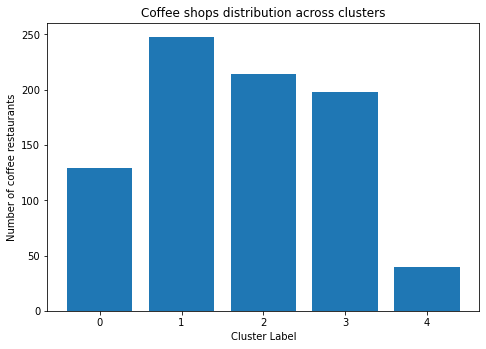

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [0,1,2,3,4]
students = [129,248,214,198,40]
ax.bar(langs,students)

plt.xlabel("Cluster Label")
plt.ylabel("Number of coffee restaurants")
plt.title("Coffee shops distribution across clusters")

plt.show()

## Results

When we have a look at the results we observe that the lowest number of coffee restaurants are in Cluster 4. So, let's filter out the neighborhoods in cluster 4 with the number of coffee shops available.

In [56]:
df_merged_coffee_shops = df_merged_coffee_shops[df_merged_coffee_shops['Cluster Labels'] == 4]
df_merged_coffee_shops.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of coffee shops
17,4,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0
19,4,M2K,North York,Bayview Village,43.786947,-79.385975,1.0
20,4,M2L,North York,"York Mills,Silver Hills",43.757490,-79.374714,0.0
21,4,M2M,North York,"Willowdale,Newtonbrook",43.789053,-79.408493,0.0
22,4,M2N,North York,Willowdale)Sout,43.770120,-79.408493,10.0


In [57]:
df_merged_coffee_shops.sort_values(by=['Number of coffee shops'])

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of coffee shops
17,4,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0
20,4,M2L,North York,"York Mills,Silver Hills",43.757490,-79.374714,0.0
21,4,M2M,North York,"Willowdale,Newtonbrook",43.789053,-79.408493,0.0
63,4,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0.0
23,4,M2P,North York,York Mills West,43.752758,-79.400049,0.0
44,4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0
30,4,M3K,North York,Downsview)East (CFB Toronto,43.737473,-79.464763,0.0
19,4,M2K,North York,Bayview Village,43.786947,-79.385975,1.0
24,4,M2R,North York,Willowdale)Wes,43.782736,-79.442259,1.0
71,4,M6A,North York,"Lawrence Manor,Lawrence Heights",43.718518,-79.464763,1.0


In [60]:
print("There are", (df_merged_coffee_shops.shape[0]), "postal codes in cluster 4.")

There are 17 postal codes in cluster 4.


Most coffee shops in Toronto can be found in Cluster 1, according to the FourSquare data pulled above.